In [0]:
# Data Source: https://www.kaggle.com/worldbank/world-development-indicators


<a href="https://www.kaggle.com/worldbank/world-development-indicators">The World Development Indicators</a> dataset is obtained from <a href="https://www.kaggle.com/">kaggle</a> and this notebook analyses data about Arab world in this dataset


In [0]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [92]:
data = pd.read_csv('./Indicators.csv')
data.shape

(5656458, 6)

In [93]:
data.head(10)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06
5,Arab World,ARB,Arms imports (SIPRI trend indicator values),MS.MIL.MPRT.KD,1960,5.380000e+08
6,Arab World,ARB,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960,4.769789e+01
7,Arab World,ARB,CO2 emissions (kt),EN.ATM.CO2E.KT,1960,5.956399e+04
8,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,6.439635e-01
9,Arab World,ARB,CO2 emissions from gaseous fuel consumption (%...,EN.ATM.CO2E.GF.ZS,1960,5.041292e+00


In [94]:
# total countries present
countries = data['CountryName'].unique().tolist()
len(countries)

247

In [95]:
# unique country codes
countryCodes = data['CountryCode'].unique().tolist()
len(countryCodes)

247

### Checking Indicators

In [96]:
indicators = data['IndicatorName'].unique().tolist()
len(indicators)

1344

In [97]:
# years of data we have
years = data['Year'].unique().tolist()
len(years)

56

### range of years

In [98]:
print(min(years)," to ",max(years))

1960  to  2015


In [0]:
# select CO2 emissions for the Arab World
hist_indicator = 'CO2 emissions \(metric'
hist_country = 'ARB'

mask1 = data['IndicatorName'].str.contains(hist_indicator) 
mask2 = data['CountryCode'].str.contains(hist_country)

stage = data[mask1 & mask2]

In [100]:
stage.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
8,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,0.643964
23204,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,0.685501
49821,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1962,0.761148
78260,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1963,0.875124
106885,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1964,0.999248


### Let's see how emissions have changed over time using MatplotLib

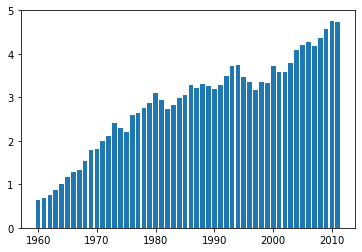

In [101]:
# get the years
years = stage['Year'].values
# get the values 
co2 = stage['Value'].values

# create
plt.bar(years,co2)
plt.show()

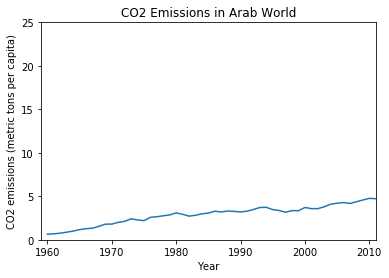

In [102]:
# switch to a line plot
plt.plot(stage['Year'].values, stage['Value'].values)

# Label the axes
plt.xlabel('Year')
plt.ylabel(stage['IndicatorName'].iloc[0])

#label the figure
plt.title('CO2 Emissions in Arab World')

# to make more honest, start they y axis at 0
plt.axis([1959, 2011,0,25])

plt.show()

### Using Histograms to explore the distribution of values 

In [0]:
hist_data = stage['Value'].values

In [105]:
print(len(hist_data))

52


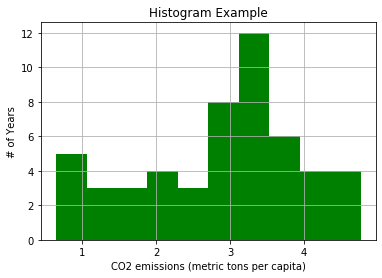

In [106]:
# the histogram of the data
plt.hist(hist_data, 10, density=False, facecolor='green')

plt.xlabel(stage['IndicatorName'].iloc[0])
plt.ylabel('# of Years')
plt.title('Histogram Example')

plt.grid(True)

plt.show()

So the Arab world has many years where it produced between 3-4 metric tons per capita.

### Arab World number with relation to other countries

In [107]:
hist_indicator = 'CO2 emissions \(metric'
hist_year = 2011

mask1 = data['IndicatorName'].str.contains(hist_indicator) 
mask2 = data['Year'].isin([hist_year])

co2_2011 = data[mask1 & mask2]
co2_2011.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5026275,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,4.724500
5026788,Caribbean small states,CSS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,9.692960
5027295,Central Europe and the Baltics,CEB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,6.911131
5027870,East Asia & Pacific (all income levels),EAS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,5.859548
5028456,East Asia & Pacific (developing only),EAP,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,5.302499


In [108]:
print(len(co2_2011))

232


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # Remove the CWD from sys.path while we load stuff.


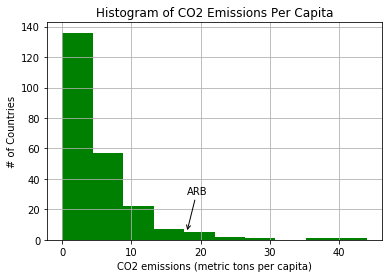

In [109]:
fig, ax = plt.subplots()

ax.annotate("ARB",
            xy=(18, 5), xycoords='data',
            xytext=(18, 30), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

plt.hist(co2_2011['Value'], 10, normed=False, facecolor='green')

plt.xlabel(stage['IndicatorName'].iloc[0])
plt.ylabel('# of Countries')
plt.title('Histogram of CO2 Emissions Per Capita')

#plt.axis([10, 22, 0, 14])
plt.grid(True)

plt.show()

### Relationship between GPD and CO2 Emissions in Arab world 

In [0]:
# select GDP Per capita emissions for the United States
hist_indicator = 'GDP per capita \(constant 2005'
hist_country = 'ARB'

mask1 = data['IndicatorName'].str.contains(hist_indicator) 
mask2 = data['CountryCode'].str.contains(hist_country)

# stage is just those indicators matching the Arab World for country code and CO2 emissions over time.
gdp_stage = data[mask1 & mask2]

#plot gdp_stage vs stage

In [111]:
gdp_stage.head(2)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
637939,Arab World,ARB,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1975,2671.447438
710493,Arab World,ARB,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1976,2915.579098


In [112]:
stage.head(2)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
8,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,0.643964
23204,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,0.685501


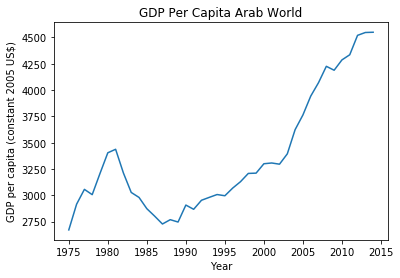

In [113]:
# switch to a line plot
plt.plot(gdp_stage['Year'].values, gdp_stage['Value'].values)

# Label the axes
plt.xlabel('Year')
plt.ylabel(gdp_stage['IndicatorName'].iloc[0])

#label the figure
plt.title('GDP Per Capita Arab World')

# to make more honest, start they y axis at 0
#plt.axis([1959, 2011,0,25])

plt.show()

### ScatterPlot for comparing GDP against CO2 emissions (per capita)


In [114]:
print("GDP Min Year = ", gdp_stage['Year'].min(), "max: ", gdp_stage['Year'].max())
print("CO2 Min Year = ", stage['Year'].min(), "max: ", stage['Year'].max())

GDP Min Year =  1975 max:  2014
CO2 Min Year =  1960 max:  2011


In [115]:
#We have 3 extra years of GDP data and 15 extra years of CO2 data, which need to be trimmed
gdp_stage_trunc = gdp_stage[gdp_stage['Year'] < 2012]
stage_trunc = stage[(stage['Year'] > 1974) & (stage['Year'] < 2012) ]
print(len(gdp_stage_trunc))
print(len(stage_trunc))

37
37


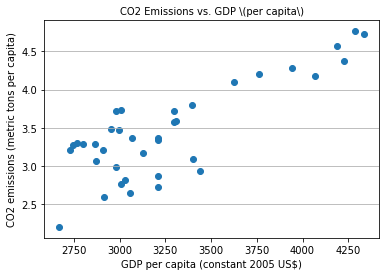

In [116]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axis = plt.subplots()
# Grid lines, Xticks, Xlabel, Ylabel

axis.yaxis.grid(True)
axis.set_title('CO2 Emissions vs. GDP \(per capita\)',fontsize=10)
axis.set_xlabel(gdp_stage_trunc['IndicatorName'].iloc[0],fontsize=10)
axis.set_ylabel(stage_trunc['IndicatorName'].iloc[0],fontsize=10)

X = gdp_stage_trunc['Value']
Y = stage_trunc['Value']

axis.scatter(X, Y)
plt.show()

In [117]:
np.corrcoef(gdp_stage_trunc['Value'],stage_trunc['Value'])

array([[1.       , 0.8160938],
       [0.8160938, 1.       ]])

### lets look at columns of dataset

In [0]:
countries = data['CountryName'].unique().tolist()
indicators = data['IndicatorName'].unique().tolist()

In [65]:
data.head(2)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,133.560907
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,87.797601


### Now we analyse common indicators between country(if any). Let's select countries randomly

In [0]:
yearsFilter = [2010, 2011, 2012, 2013, 2014]

In [0]:
# Pick 2 countries randomly
countryFilter = random.sample(countries, 2)

In [68]:
countryFilter

['Dominica', 'Paraguay']

In [69]:
# Pick 1 Indicator randomly
indicatorsFilter = random.sample(indicators, 1)
indicatorsFilter

['Merchandise imports from developing economies in East Asia & Pacific (% of total merchandise imports)']

### Filtering data

In [0]:
filterMesh = (data['CountryName'] == countryFilter[0]) & (data['IndicatorName'].isin(indicatorsFilter)) & (data['Year'].isin(yearsFilter))
country1_data = data.loc[filterMesh]

In [72]:
len(country1_data)

5

In [0]:
filterMesh = (data['CountryName'] == countryFilter[1]) & (data['IndicatorName'].isin(indicatorsFilter)) & (data['Year'].isin(yearsFilter))
country2_data = data.loc[filterMesh]

In [74]:
len(country2_data)

5

### The code below will randomly pick countries and indicators until it finds two countries who have data for an indicator over this time frame.

In [0]:
filteredData1 = []
filteredData2 = []

In [0]:
''' 
countryFilter:    pick two countries, 
indicatorsFilter: pick an indicator, 
yearsFilter: plot for years in yearsFilter
'''
# problem - not all countries have all indicators so if you go to visualize, it'll have missing data.
# randomly picking two indicators and countries, do these countries have valid data over those years

while(len(filteredData1) < len(yearsFilter)-1):
    indicatorsFilter = random.sample(indicators, 1)
    countryFilter    = random.sample(countries, 2)
    filterMesh = (data['CountryName'] == countryFilter[0]) & (data['IndicatorName'].isin(indicatorsFilter)) & (data['Year'].isin(yearsFilter))
    filteredData1 = data.loc[filterMesh]
    filteredData1 = filteredData1[['CountryName','IndicatorName','Year','Value']]

    if(len(filteredData1) < len(yearsFilter)-1):
        print('Skipping ... %s since very few rows (%d) found' % (indicatorsFilter, len(filteredData1)))

In [78]:
indicatorsFilter

['Immunization, measles (% of children ages 12-23 months)']

In [79]:
len(filteredData1)

5

In [0]:
'''
Country 2
'''

while(len(filteredData2) < len(filteredData1)-1):
    filterMesh = (data['CountryName'] == countryFilter[1]) & (data['IndicatorName'].isin(indicatorsFilter)) & (data['Year'].isin(yearsFilter))
    filteredData2 = data.loc[filterMesh]
    filteredData2 = filteredData2[['CountryName','IndicatorName','Year','Value']]
    #pick new indicator
    old = countryFilter[1]
    countryFilter[1]    = random.sample(countries, 1)[0]
    
    if(len(filteredData2) < len(filteredData1)-1):
        print('Skipping ... %s, since very few rows (%d) found' % (old, len(filteredData2)))

In [0]:
if len(filteredData1) < len(filteredData2):
    small = len(filteredData1)
else:
    small = len(filteredData2)

In [0]:
filteredData1=filteredData1[0:small]
filteredData2=filteredData2[0:small]

### Building plots on the data

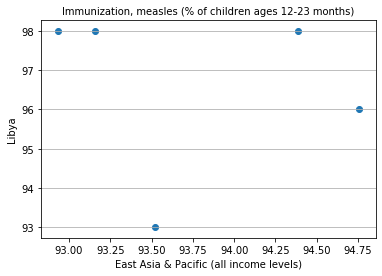

In [83]:
# Scatter plot
fig, axis = plt.subplots()
# Grid lines, Xticks, Xlabel, Ylabel

axis.yaxis.grid(True)
axis.set_title(indicatorsFilter[0],fontsize=10)
axis.set_xlabel(filteredData1['CountryName'].iloc[0],fontsize=10)
axis.set_ylabel(filteredData2['CountryName'].iloc[0],fontsize=10)

X = filteredData1['Value']
Y = filteredData2['Value']

axis.scatter(X, Y)

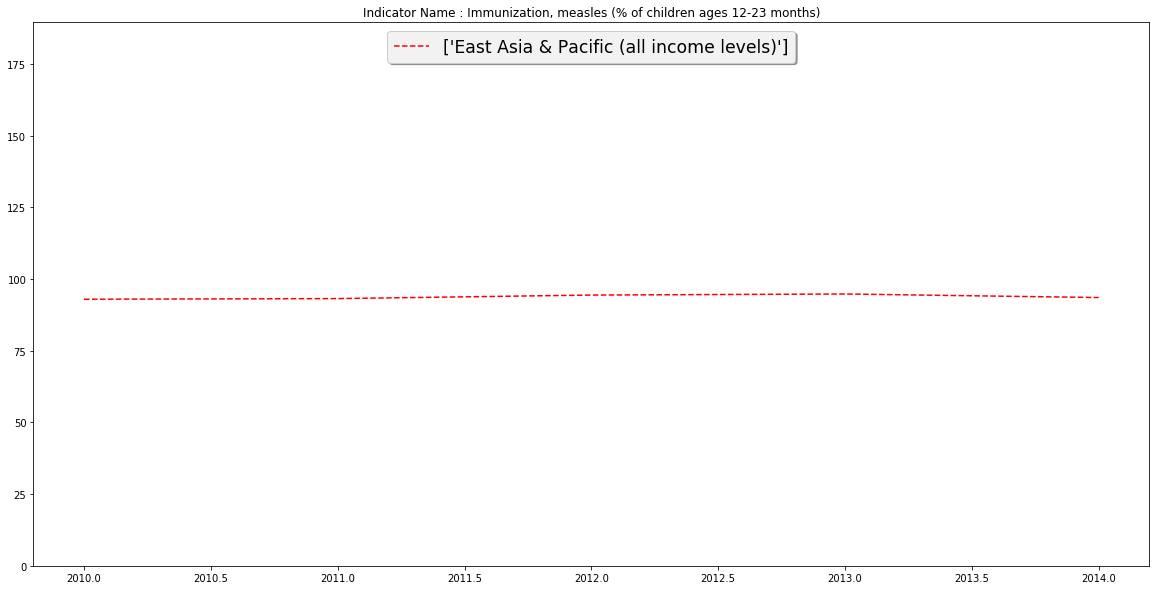

In [84]:
# Line plot
fig, ax = plt.subplots(figsize=(20, 10))

ax.set_ylim(min(0,filteredData1['Value'].min()), 2*filteredData1['Value'].max())
ax.set_title('Indicator Name : ' + indicatorsFilter[0])
ax.plot(filteredData1['Year'], filteredData1['Value'] , 'r--', label=filteredData1['CountryName'].unique()) 

# Add the legend
legend = plt.legend(loc = 'upper center', 
                    shadow=True,
                    prop={'weight':'roman','size':'xx-large'})

# Rectangle around the legend
frame = legend.get_frame()
frame.set_facecolor('.95')
plt.show()